# YoloR Code Setup

1. Clone the “paper” branch of the YoloR repository.

```bash
	git clone -b paper https://github.com/WongKinYiu/yolor.git
    cd yolor
```


By default, the code requires PyTorch <=1.7.1, but we can get it to run with the later versions with some minor changes. The source of error comes from the arguments passed to the `nn.Upsample` module.

2. Copy and replace the following files in the cloned repository with updated files provided in the **updated_yolor_repo_files** folder:

    * Copy: `configs.py` and place in the root directory.
    * Copy: `detect_video.py` and place in the root directory.
    * Replace: `detect.py` script with the provided `detect.py` in the root directory.
    * Replace: `models/experimental.py` script with the provided `experimental.py`
    * Replace: `models/yolo.py` script with the provided `yolo.py` 
    * Replace: `utils/datasets.py` script with the provided `datasets.py`
    <br>
    
    That’s all the changes required for running YoloR with the latest version of PyTorch.


3. Create a new folder named *weights* in the cloned repository and download the following PyTorch weights `.pt` files provided in the [YoloR Github releases](https://github.com/WongKinYiu/yolor/releases/tag/weights).
    
    * yolor-p6-paper-541.pt
    * yolor-w6-paper-555.pt
    * yolor-e6-paper-564.pt
    * yolor-d6-paper-573.pt


4. Also download the *.pt* files for the lightweight models [YoloR-S4-DWT](https://drive.google.com/file/d/1IZ1ix1hwUjEMcCMpl67CHQp98XOjcIsv/view?usp=sharing) and [YoloR-S4-S2D](https://drive.google.com/file/d/1rFoRk1ZoKvE8kbxAl2ABBy6m9Zl6_k4Y/view?usp=sharing). Also place them in the previously created *weights* folder


5. To run the `YoloR-S4-DWT` model, some additional installation is required. Open a terminal from inside the cloned repository and run the following commands in order:

```bash
git clone https://github.com/fbcotter/pytorch_wavelets
cd pytorch_wavelets
pip install -r requirements.txt
pip install .
cd ..
```

And that's it that'll all the setup required.

At this point your directory structure of the cloned repo should look like this:

```html
yolor
└───│
    ├───data
    ├───figure
    ├───inference
    ├───models
    │   └─── ...
    │   └─── experimental.py <------updated
    │   └─── yolo.py  <------updated
    │   └─── ...
    ├───pytorch_wavelets
    ├───scripts
    ├───utils
    │   └─── ...
    │   └─── datasets.py <------updated
    │   └─── ...
    ├───weights
    ├───LiCENSE
    ├───README.md
    ├───configs.py <------ added                       
    ├───detect.py  <------updated
    ├───detect_video.py <------ added
    ├───requirements.txt
    ├───test.py
    ├───train.py
    ├───tune.py
```

Finally, to perform inference, the execution command is as follows:

```bash
python detect.py --weights {weight_file_path} --source {source_path_image_or_video_} --img-size {640|1280} --device {0 | cpu} --project {save root folder path} --name {save folder name} --exist-ok 
```

The command line arguments are as follows

* `––source`: The path to the video file. This can also be an image or path to a directory containing multiple images and videos.
* `––weights`: The path to the weights file.
* `––img-size`: The frame size on which to run inference (use model specific).
* `––device`: The computation device. We can provide CPU or one digit from 0 to 3 indicating which GPU to use.
* `––project`: root save folder
* `––name`: The name of the output directory

# Run  Inference on Image

You can either run inference from inside the cloned repository Or as shown in the cell below - directly from this notebook.


**Steps to run inference inference from inside the repo**

1. Open a terminal in the current directory.
2. Change directory to yolor: `cd yolor`

---

1. **Run inference using the lightweight DWT model**

```bash

python detect.py --weights weights\yolor-ssss-dwt.pt --source inference\images\horses.jpg --img-size 640 --device cpu --project inference_tests --name DWT_results --exist-ok
```

2. **Run inference using the lightweight S2D model**

```bash
python detect.py --weights weights\yolor-ssss-S2D.pt --source inference\images\horses.jpg --img-size 640 --device cpu --project inference_tests --name S2D_results --exist-ok
```

3. **Run inference using the YoloR-P6**

```bash
python detect.py --weights weights\yolor-p6-paper-541.pt --source inference\images\horses.jpg --img-size 1280 --device cpu --project inference_tests --name P6_results --exist-ok
```

Note: An **inference_tests** folder will be created within the current directory and results will be saved in respective {name} folders

In [1]:
# Example run from the notebook
# Ensure the path to script and weights are correct.
# The provided notebook lies of the root le

!python yolor\detect.py --weights yolor\weights\yolor-w6-paper-555.pt --source .\assests\horses.jpg --device cpu --project .\inference_tests --name W6_results --exist-ok

Namespace(weights=['yolor\\weights\\yolor-w6-paper-555.pt'], source='.\\assests\\horses.jpg', img_size=1280, conf_thres=0.25, iou_thres=0.45, device='cpu', view_img=False, save_txt=False, save_conf=False, classes=None, agnostic_nms=False, augment=False, update=False, project='.\\inference_tests', name='W6_results', exist_ok=True)
Fusing layers... 
image 1/1 C:\Users\vaibh\Desktop\Work\big_vision\work\BLOG_POSTS\learnopencv\YoloR-paper-explanation-analysis\assests\horses.jpg: 896x1280 5 horses, Done. (1.812s)
Results saved to inference_tests\W6_results
Done. (2.989s)


Using torch 1.13.0 CPU

Model Summary: 519 layers, 79839352 parameters, 0 gradients
C:\Users\vaibh\miniconda3\envs\pytorchx\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


**Note:**

1. Results will be saved in a folder **inference_tests\W6_results** in the current directory (same as this notebook)
2. The path provided for  `--project` can be anything, you can change it to suite your requirements. Similarly, the value passed to the `--name` is up to you. 

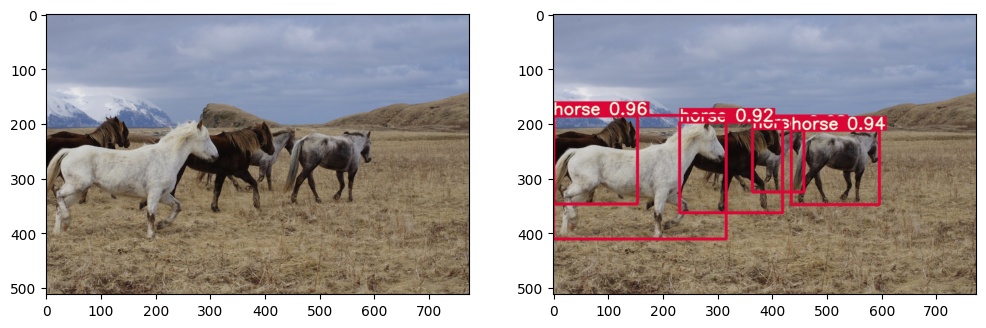

In [2]:
import os
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
image = plt.imread(os.path.join(os.getcwd(), "assests", "horses.jpg"))
plt.imshow(image)

plt.subplot(1, 2, 2)
image = plt.imread(os.path.join(os.getcwd(), "inference_tests", "W6_results", "horses.jpg"))
plt.imshow(image)

plt.show()

# Run Inference on Videos

* The commands stay the same, but we'll use a separate script, which has been slightly updated that also print some additional information on each frame.


**Command to run from inside the cloned repository**

```bash

python detect_video.py --weights {weights_file_path} --model-name {model_name_to_print} --source {source_video_path} --img-size {640 | 1280} --device {0 | cpu} --project {save root folder path} --name {save folder name} --exist-ok 

```


**Run inference using the lightweight DWT model**

```bash
python detect_video.py --weights weights\yolor-ssss-dwt.pt --model-name YoloR-S4-DWT --source ..\assests\test_video.mp4 --img-size 640 --device cpu --project ..\inference_tests --name DWT_results --exist-ok
```

An additional `--model-name` command-line argument is added. The value passed will be printed on the video frames to indicate the model used for inference. You can pass anything over here. 

In [3]:
# Example run from the notebook
# Ensure the path to script and the weights is correct.

# Running YoloR-D6 on GPU with 1280 image size.

!python yolor\detect_video.py --weights yolor\weights\yolor-d6-paper-573.pt --model-name YoloR-D6 --source .\assests\test_video.mp4 --img-size 1280 --device 0 --project .\inference_tests --name D6_results --exist-ok

Fusing layers... 
Results saved to inference_tests\D6_results
Done. (28.686s)
Average FPS [YoloR-D6 (1280)]: 5.004260664527909



C:\Users\vaibh\miniconda3\envs\pytorchx\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
